In [1]:
import warnings
warnings.filterwarnings('ignore')

!pip install -q keras

import os
import pandas as pd
import numpy as np

from google.colab import files

from sklearn.utils import shuffle
from keras.utils import to_categorical

import matplotlib.pyplot as plt

from pylab import rcParams

Using TensorFlow backend.


### 將本機端的 `pkgo_nyc_5class.csv.bz2` 上傳到 colab

In [0]:
if not os.path.exists('pkgo_nyc_5class.csv.bz2'):
    uploaded = files.upload()

### 讀取 `pkgo_nyc_5class.csv.bz2`

In [0]:
pkgo = pd.read_csv('pkgo_nyc_5class.csv.bz2')

### 建構模型

In [0]:
''' Import keras to build a DL model '''
from keras.models import Model, Sequential
from keras.layers import Dense, Activation, LeakyReLU
from keras.optimizers import SGD, RMSprop, Adam

def build_model(X):
    model = Sequential()
    model.add(Dense(128, input_dim=X.shape[-1]))
    model.add(Activation('relu'))
    model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(Dense(5))
    model.add(Activation('softmax'))
    return model

In [0]:
def Xy_split(pkgo):
    num_cols = pkgo.shape[1]
    X = pkgo.iloc[:, :num_cols-1]
    y = pkgo['class']
    
    # 型別轉換，確保資料型態正確
    X = X.astype(np.float32)
    y = y.astype(np.int)
    
    # 對 y 做 one-hot encoding
    y = to_categorical(y)
    
    # 打亂資料集
    X, y = shuffle(X, y)
    
    return X, y

X, y = Xy_split(pkgo)

## 比較不同 optimizer 對訓練結果之差異

In [6]:
optim_list = ['SGD', 'RMSprop', 'Adam']

import keras.backend as K

batch_size = 32
epochs = 30
all_loss, all_acc = [], []

for optim in optim_list:
    K.clear_session()
    print("Running model, optimizer = {}".format(optim))

    model = build_model(X)

    if optim == "SGD":
        optim = SGD(lr= 0.01, momentum=0.0, decay=0.0, nesterov=False)
    elif optim == "Adam":
        optim = Adam(lr = 0.001)
    elif optim == "RMSprop":
        optim = RMSprop(lr = 0.001)
    
    model.compile(loss='categorical_crossentropy',
                  optimizer=optim,
                  metrics=['accuracy'])

    history = model.fit(X, y,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=0,
                        shuffle=True,
                        validation_split=0.1)

    loss = history.history.get('loss')
    acc = history.history.get('acc')

    all_loss.append(loss)
    all_acc.append(acc)

Running model, optimizer = SGD
Running model, optimizer = RMSprop
Running model, optimizer = Adam


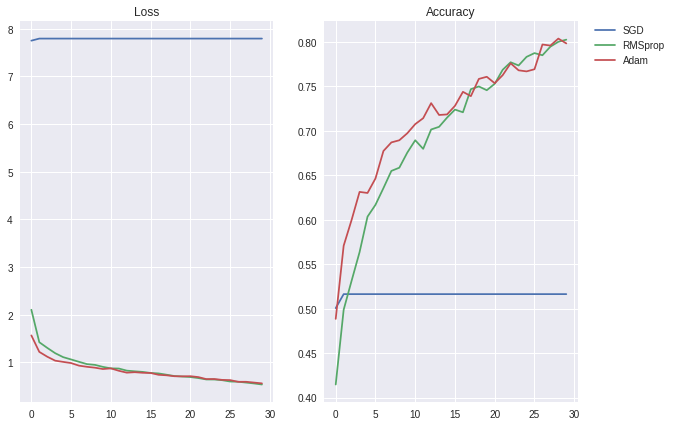

In [7]:
''' Visualize the loss and accuracy of different optimizers'''
rcParams['figure.figsize'] = 10, 7

plt.figure(0)
plt.subplot(121)
for k in range(len(optim_list)):
    plt.plot(range(len(all_loss[k])), all_loss[k], label=optim_list[k])
plt.title('Loss')

plt.subplot(122)
for k in range(len(optim_list)):
    plt.plot(range(len(all_acc[k])), all_acc[k], label=optim_list[k])
plt.title('Accuracy')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()